# scikit-learn付属のデータセットの読み込み（boston house-prices dataset）
* <https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston>
* 回帰問題であることに注意


In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston
boston_data = sklearn.datasets.load_boston()

In [0]:
# データセットを学習用とテスト用に分ける
N = len(boston_data.data)
index = np.arange(N)
np.random.seed(2019)
np.random.shuffle(index)

# 訓練データ（8割を訓練データに）
X_train, t_train = boston_data.data[index[:int(0.8*N)]], boston_data.target[index[:int(0.8*N)]]
# テスト用データ（残りの2割）
X_test, t_test = boston_data.data[index[int(0.8*N):]], boston_data.target[index[int(0.8*N):]]

In [340]:
boston_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

* 精度の評価には例えば平均二乗誤差を使いましょう
```
# 使用例
from sklearn.metrics import mean_squared_error
mean_squared_error(predict, t_test)
```

# 宿題
* boston house-prices datasetに対して機械学習アルゴリズムを適用してください
* アルゴリズムは何でも良いですが，できるだけ予測精度が高くなるように頑張ってみましょう
* 工夫した点，難しかった点，その他授業の感想・要望などをコメントとして記入するようにしてください
* 授業支援システムから拡張子 `.ipynb` 形式のファイルを提出してください
    * Colaboratoryでプログラムを作成後に，上のメニューの「ファイル」から「.ipynbをダウンロード」を選択することで保存できます
* 締切：2019年1月21日（月）17:00

In [0]:
from sklearn.metrics import mean_squared_error #平均二乗誤差で精度の評価を行う

##**決定木を適用**

In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeRegressor()

In [344]:
clf.fit(X_train[:,[0,1,2,3,4,5,7,8,10,12]],t_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
predict=clf.predict(X_test[:,[0,1,2,3,4,5,7,8,10,12]])

In [346]:
mean_squared_error(predict,t_test)

22.670588235294115

## 線形回帰を適用

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
mod = LinearRegression()

In [349]:
mod.fit(X_train[:,[0,1,2,3,4,5,7,8,10,12]],t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
predict = mod.predict(X_test[:,[0,1,2,3,4,5,7,8,10,12]])

In [351]:
mean_squared_error(predict,t_test)

29.33843845236556

## リッジ回帰を適用

In [0]:
from  sklearn.linear_model import Ridge

In [357]:
model = Ridge(alpha=0.5)
model.fit(X_train[:,[0,1,2,3,4,5,7,8,10,12]],t_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [358]:
predict = model.predict(X_test[:,[0,1,2,3,4,5,7,8,10,12]])
mean_squared_error(predict,t_test)

29.42872910578712

In [359]:
model

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## ラッソ

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lasso = Lasso(alpha=0.5).fit(X_train[:,[0,1,2,3,4,5,7,8,10,12]],t_train)

In [371]:
predict = lasso.predict(X_test[:,[0,1,2,3,4,5,7,8,10,12]])
mean_squared_error(predict,t_test)

31.9699656432128

## ニューラルネット CNN

In [0]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam

In [0]:
model = Sequential()
model.add(Dense(10,input_dim=10,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mean_squared_error',optimizer=Adam(),metrics=['accuracy'])

In [366]:
cnn = model.fit(X_train[:,[0,1,2,3,4,5,7,8,10,12]],t_train, epochs=300, validation_data=(X_test[:,[0,1,2,3,4,5,7,8,10,12]],t_test))

Train on 404 samples, validate on 102 samples
Epoch 1/300
404/404 [==============================] - 1s 2ms/step - loss: 359.8856 - acc: 0.0025 - val_loss: 252.9307 - val_acc: 0.0000e+00
Epoch 2/300
404/404 [==============================] - 0s 114us/step - loss: 223.6130 - acc: 0.0000e+00 - val_loss: 179.9331 - val_acc: 0.0098
Epoch 3/300
404/404 [==============================] - 0s 116us/step - loss: 120.7444 - acc: 0.0000e+00 - val_loss: 86.0290 - val_acc: 0.0098
Epoch 4/300
404/404 [==============================] - 0s 124us/step - loss: 78.5289 - acc: 0.0050 - val_loss: 94.1597 - val_acc: 0.0098
Epoch 5/300
404/404 [==============================] - 0s 113us/step - loss: 72.8500 - acc: 0.0173 - val_loss: 76.5147 - val_acc: 0.0098
Epoch 6/300
404/404 [==============================] - 0s 125us/step - loss: 67.1639 - acc: 0.0124 - val_loss: 78.1935 - val_acc: 0.0196
Epoch 7/300
404/404 [==============================] - 0s 114us/step - loss: 62.4590 - acc: 0.0000e+00 - val_loss: 69

In [367]:
predict = model.evaluate(X_test[:,[0,1,2,3,4,5,7,8,10,12]] , t_test)

102/102 [==============================] - 0s 126us/step


In [368]:
predict[0]

10.875091777128333

## 残差プロット

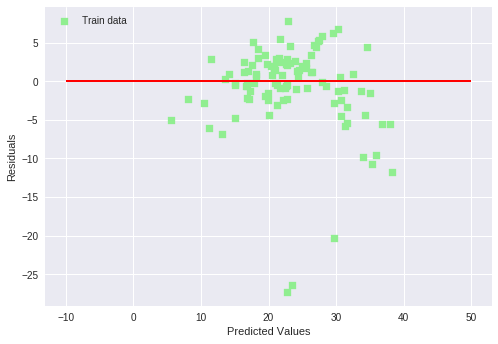

In [373]:
plt.scatter(predict,predict-t_test,c='lightgreen',marker='s',label='Train data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

# 特徴の可視化

In [0]:
import matplotlib.pyplot as plt

## CRIMと価格のグラフ

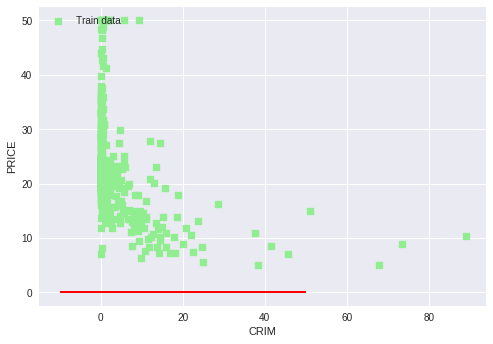

In [375]:
plt.scatter(X_train[:,0],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('CRIM')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## ZNと価格のグラフ

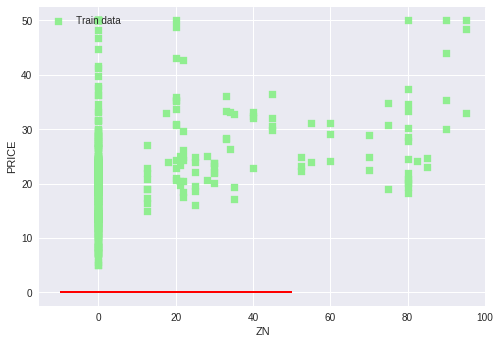

In [376]:
plt.scatter(X_train[:,1],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('ZN')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## INDUSと価格のグラフ

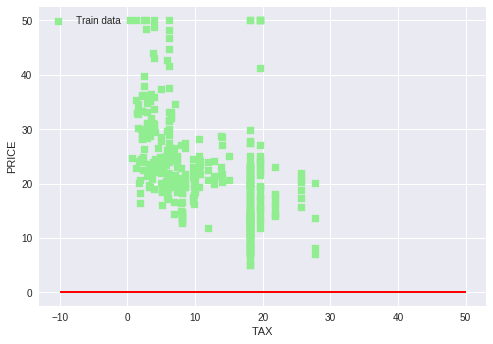

In [377]:
plt.scatter(X_train[:,2],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('TAX')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## CHASと価格のグラフ

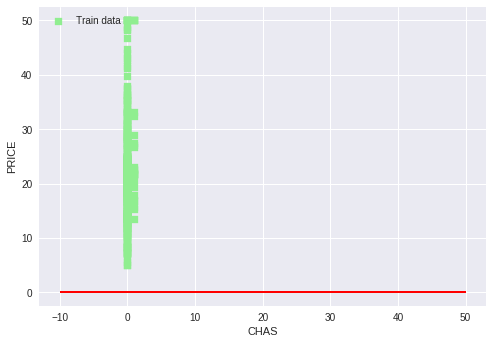

In [378]:
plt.scatter(X_train[:,3],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('CHAS')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## NOXと価格のグラフ

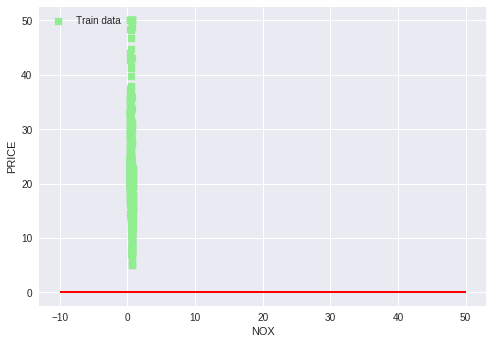

In [379]:
plt.scatter(X_train[:,4],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('NOX')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## RMと価格のグラフ

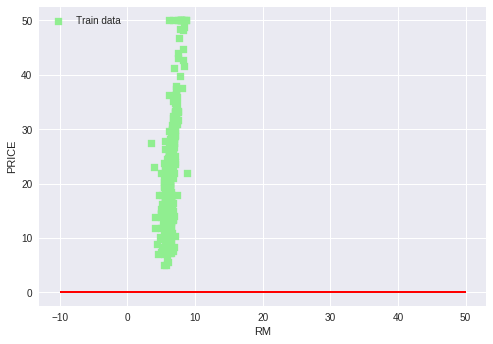

In [380]:
plt.scatter(X_train[:,5],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## AGEと価格のグラフ

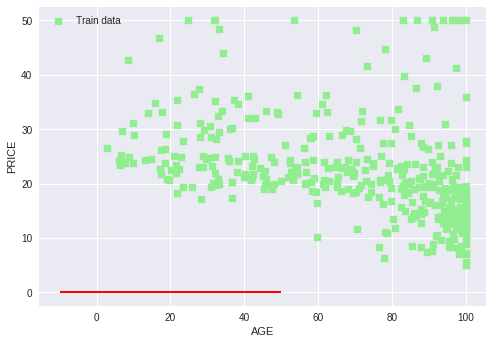

In [381]:
plt.scatter(X_train[:,6],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## DISと価格のグラフ

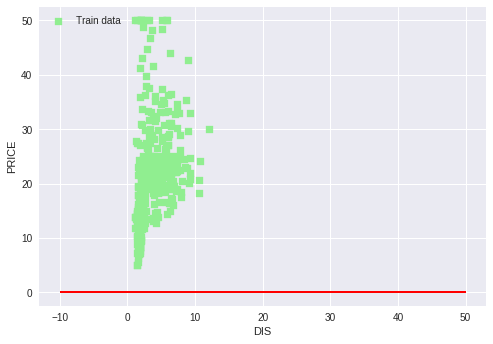

In [382]:
plt.scatter(X_train[:,7],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('DIS')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## RADと価格のグラフ

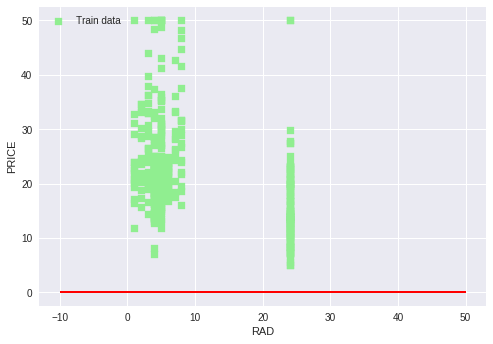

In [383]:
plt.scatter(X_train[:,8],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('RAD')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## TAXと価格のグラフ

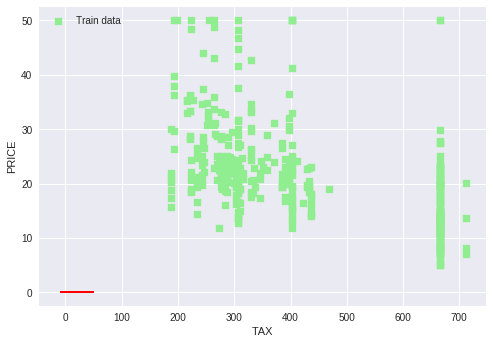

In [384]:
plt.scatter(X_train[:,9],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('TAX')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## PTRATIOと価格のグラフ

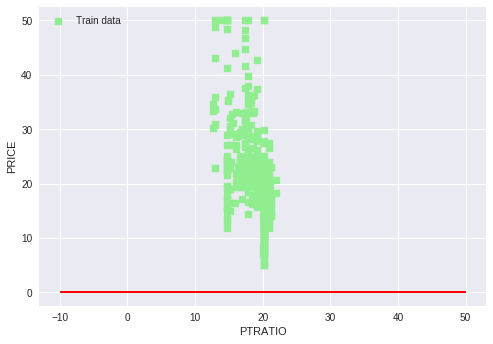

In [385]:
plt.scatter(X_train[:,10],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## Bと価格のグラフ

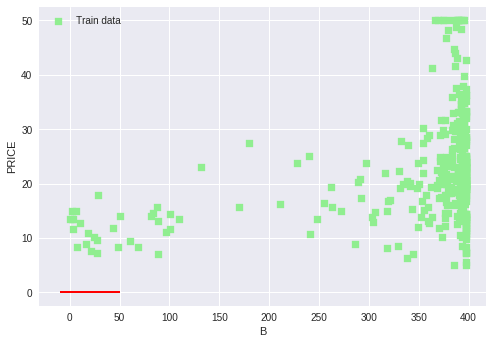

In [386]:
plt.scatter(X_train[:,11],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('B')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()

## LSTATと価格

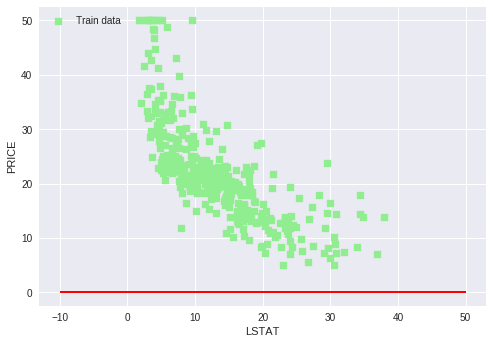

In [387]:
plt.scatter(X_train[:,12],t_train,c='lightgreen',marker='s',label='Train data')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.show()